In [7]:
import diplib as dp
import cv2
import numpy as np
import matplotlib.pyplot as plt
from inpaint import *
import inpaint

In [28]:

# Read the image
img_gray = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
# Read the image in colour
img_col = cv2.imread('test.png', cv2.IMREAD_RGB2BGR)

# Test the function
x_width = img_gray.shape[1]
y_height = img_gray.shape[0]
x1,y1,x2,y2=(120,5,280,150)
print("x_width",x_width,"y_height",y_height)


plt.imshow(img_col, cmap='gray')
plt.axis('off')
plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='r', facecolor='none'))
plt.show()

AttributeError: module 'cv2' has no attribute 'IMREAD_RGB2BGR'

In [11]:

#define contour and regions
image = np.zeros((x_width, y_height), np.uint8) 
thickness = 1
contour = cv2.rectangle(image.copy(),[x1,y1],[x2,y2], 255, thickness) 
# Creating rectangle
thickness = -1
target_region = cv2.rectangle(image.copy(),[x1,y1],[x2,y2], 255, thickness) 
thickness = -1
source_region =np.array(cv2.bitwise_not(target_region))

#get x and y pixel co-ordinates
temp=np.where(np.array(np.array(contour)==255,dtype=int)==1)
contour_indices = np.array(list(zip(temp[0],temp[1])))
temp=np.where(np.array(np.array(source_region)==255,dtype=int)==1)
source_indices = np.array(list(zip(temp[0],temp[1])))
temp=np.where(np.array(np.array(target_region)==255,dtype=int)==1)
target_indices = np.array(list(zip(temp[0],temp[1])))

# Calculate the gradient in the x and y directions
grad_x = cv2.Sobel(source_region, cv2.CV_64F, 1, 0, ksize=5)
grad_y = cv2.Sobel(source_region, cv2.CV_64F, 0, 1, ksize=5)

# Calculate the direction of the gradient
gradient_direction = np.arctan2(grad_y, grad_x)
normal = (gradient_direction - np.pi / 2)

P=in_paint_alg(img,contour_indices,source_region,normal)



1.0 	max all	 1.0
0.9999550045926715 0.592592592592593
0.9713990064967776 0.5432098765432101
1.0 0.49382716049382713
0.9355525504363743 0.4444444444444444
0.9966245561240313 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
0.7701078584291217 0.3950617283950617
0.6723877847348858 0.3950617283950617
0.9988856665066939 0.3950617283950617
0.7740288842194228 0.39506

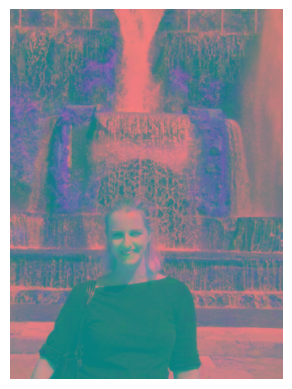

In [22]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('test.png',cv2.COLOR_RGB2LAB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()
# rgb = io.imread('test.png')
# lab = color.rgb2lab(rgb)